## Import Cleaned Data

__DataFrames:__  
df_model - df with all the features (independent festures + Target)  
x - df with all independent features
y - df with dependent feature  
x_train - df with training data from x  
x_train_out - df with training data from x with outliers treatment applied  
x_test - df with test data from x  
x_test_out - df with test data from x with outliers treatment applied  



CAPM
Import data from: C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample\LongTerm-DataPreparation_Skew.csv
Original CAPM is being used as Target
Nr of rows:
72538
CAPM
Import data from: C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample\LongTerm-DataPreparation.csv
Original CAPM is being used as Target
Nr of rows:
72538


<Figure size 432x288 with 0 Axes>

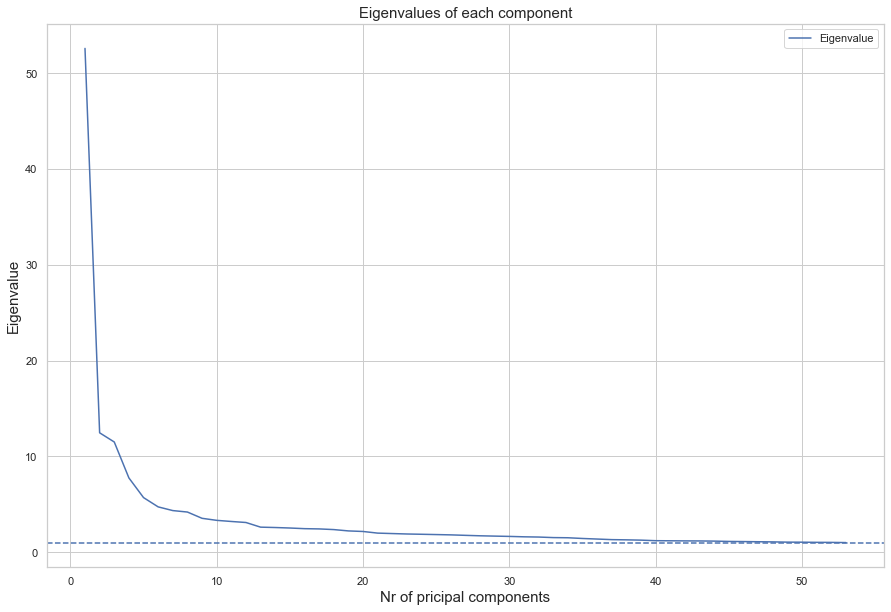

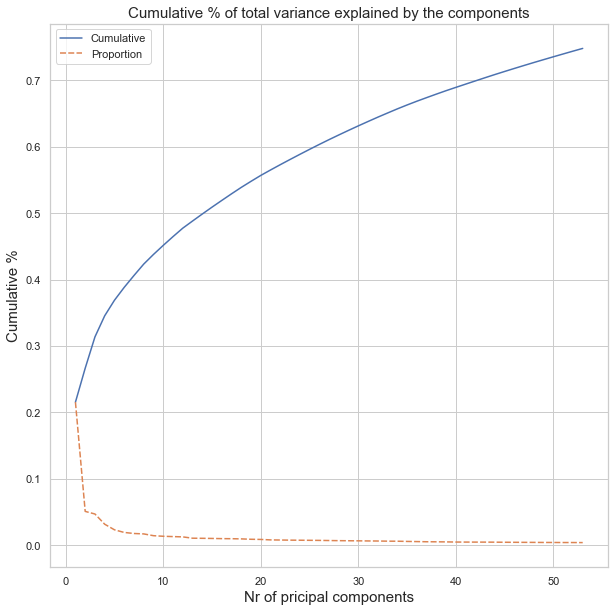

The variance explained by each component is: [52.57262761 12.46288555 11.50406925  7.75558374  5.70240322  4.73326278
  4.34727049  4.19481287  3.54083746  3.3284659   3.21084215  3.10349184
  2.61801742  2.57999819  2.52808463  2.46092403  2.43351593  2.36484452
  2.22577085  2.16695275  1.99600401  1.94976959  1.90444145  1.87541659
  1.84412746  1.81236771  1.76324687  1.71654423  1.68337192  1.65228791
  1.61038711  1.58573914  1.52924602  1.51176831  1.43682567  1.37723706
  1.31595961  1.29381722  1.26270524  1.20604046  1.19481454  1.18452803
  1.17846219  1.16180139  1.12809299  1.11329252  1.09599935  1.08103929
  1.05438238  1.04896434  1.03267288  1.02749898  1.0072945 ]
The total variance explained by the components is: 0.7478169554409864


In [2]:
import sys
sys.path.insert(1, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions')
sys.path.insert(2, r'C:\Users\rafae\Personal\Github\Functions\Data-Science-Functions\Functions')
sys.path.insert(3, r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM')

import Visualizations_Functions as viz 
import Classification_CV as class_cv
import DataPreparation as preprocess 
import FeatureExtraction as ft_extract 
import DataScalling as scalling
import FeatureSelection as ft_selection
import importCleanedData as importData
import importCleanedData_Orig as importDataOrig
import importSubsets as subsets

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from tensorflow import keras

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#set preferences
sns.set_style('whitegrid')

#set color for graphs
#set color for graphs
palette = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3"]

dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample'
df_model_skew,df_target = importData.importCleanedData(dir=dir,target='CAPM')


#split data
date = '2018-01-01'
#split data without transformation
x_train_skew,x_train_out_skew,x_test_skew, x_test_out_skew,y_train_dict_skew ,y_test_dict_skew, y_train_skew,y_test_skew = importData.splitData(df_model_skew, date) 



dir = r'C:\Users\rafae\Personal\Github\Asset-Allocation\Long-Term-CAPM\SampleData\Sample'
df_model,df_target = importDataOrig.importCleanedData(dir=dir,target='CAPM')

x_train,x_train_out,x_test, x_test_out,y_train_dict ,y_test_dict, y_train,y_test = importDataOrig.splitData(df_model, date) 


#set columns
ratio_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Ratio'))]
shares_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Share'))]
margin_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Margin'))]
turnover_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('Turnover'))]
dividend_cols = df_model_skew.columns[(df_model_skew.columns.str.contains('dividend'))]



tran_component, test_components = importData.runPCA(x_train_out= x_train_out,x_test = x_test)



def import_folderData_csv_file (path):
    import os
    import glob
    import time 
    import pandas as pd 
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    df = pd.DataFrame()
    for file in csv_files:
        df_temp = pd.read_csv(file)
        df_temp['file'] = file
        df = pd.concat([df, df_temp], axis=0)
        
        
    return(df)


#Target 0 
#import validation data 
target_0_val_path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\Target_0\Validation\Full_Validation'
target_0_val = import_folderData_csv_file(target_0_val_path)


target_0_test_path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\Target_0\Test'
target_0_test = import_folderData_csv_file(target_0_test_path)
target_0_test.loc[target_0_test['model']=='Keras_NN','model'] = 'NeuralNetwork'


#Target 15
target_15_val_path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\Target_15\Validation\Full_Validation'
target_15_val = import_folderData_csv_file(target_15_val_path)
target_15_val = target_15_val.loc[((target_15_val['model']=='Keras_NN') & (target_15_val['subset']=='PCA'))==False]

target_15_val = target_15_val.loc[target_15_val.model!='MLP-Oversampling']
target_15_val = target_15_val.loc[target_15_val.subset!='Lasso - Outliers']
target_15_val.loc[target_15_val['model']=='Keras_NN','model'] = 'NeuralNetwork'


target_15_test_path = r'D:\Utilitários\Facul\Mestrado\2o Ano\Research\Thesis\Tables\Target_15\Test'
target_15_test = import_folderData_csv_file(target_15_test_path)
target_15_test.loc[target_15_test['model']=='Keras_NN','model'] = 'NeuralNetwork'

#import subsets
lasso_subset_0, lasso_ubset_15, mi_subset_0, mi_subset_15, lgb_subset, corr_subset0, corr_subset15 = subsets.importSubsets()

## Z-Score Outlier Analysis

In [3]:
x_train_skew_stand = (x_train_skew - x_train_skew.mean()) / x_train_skew.std() 

### Target 0 - Lasso

In [62]:
x_train_lasso = x_train_skew_stand[lasso_subset_0]
outliers_lasso = x_train_lasso.loc[abs(x_train_lasso.values>4.5) ].reset_index().drop_duplicates(['symbol','date']).set_index(['symbol', 'date', 'fillingDate', 'year', 'quarter']).index
x_train_out_lasso = x_train_skew.loc[x_train_skew.index.isin(outliers_lasso)==False,lasso_subset_0]

x_train_skew_stand_out = (x_train_out_lasso - x_train_out_lasso.mean()) / x_train_out_lasso.std() 

Y_train = y_train_dict['Target_0'].loc[y_train_dict['Target_0'].index.isin(x_train_skew_stand_out.index)]

init_len = len(x_train_lasso)
fin_len = len(x_train_skew_stand_out)

pct_removed =1-( fin_len/init_len)

print(f'{pct_removed}% of the data was removed')

0.05027582271257369% of the data was removed


#### Feature Distribution

Number of metric features : 40


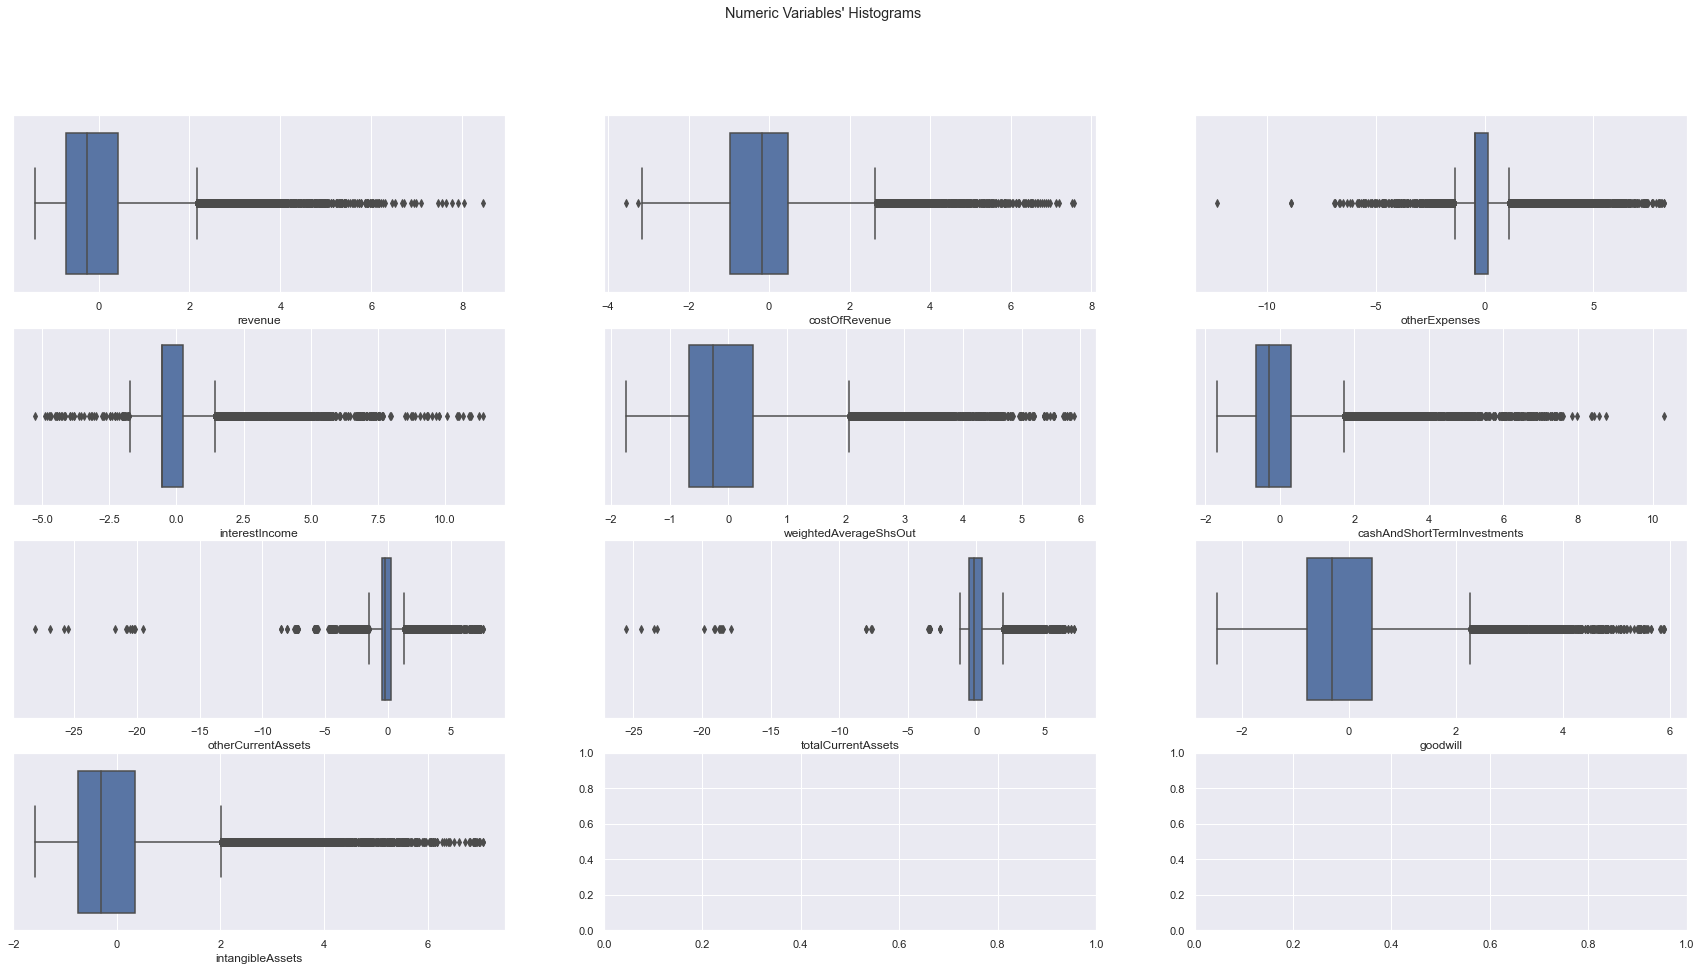

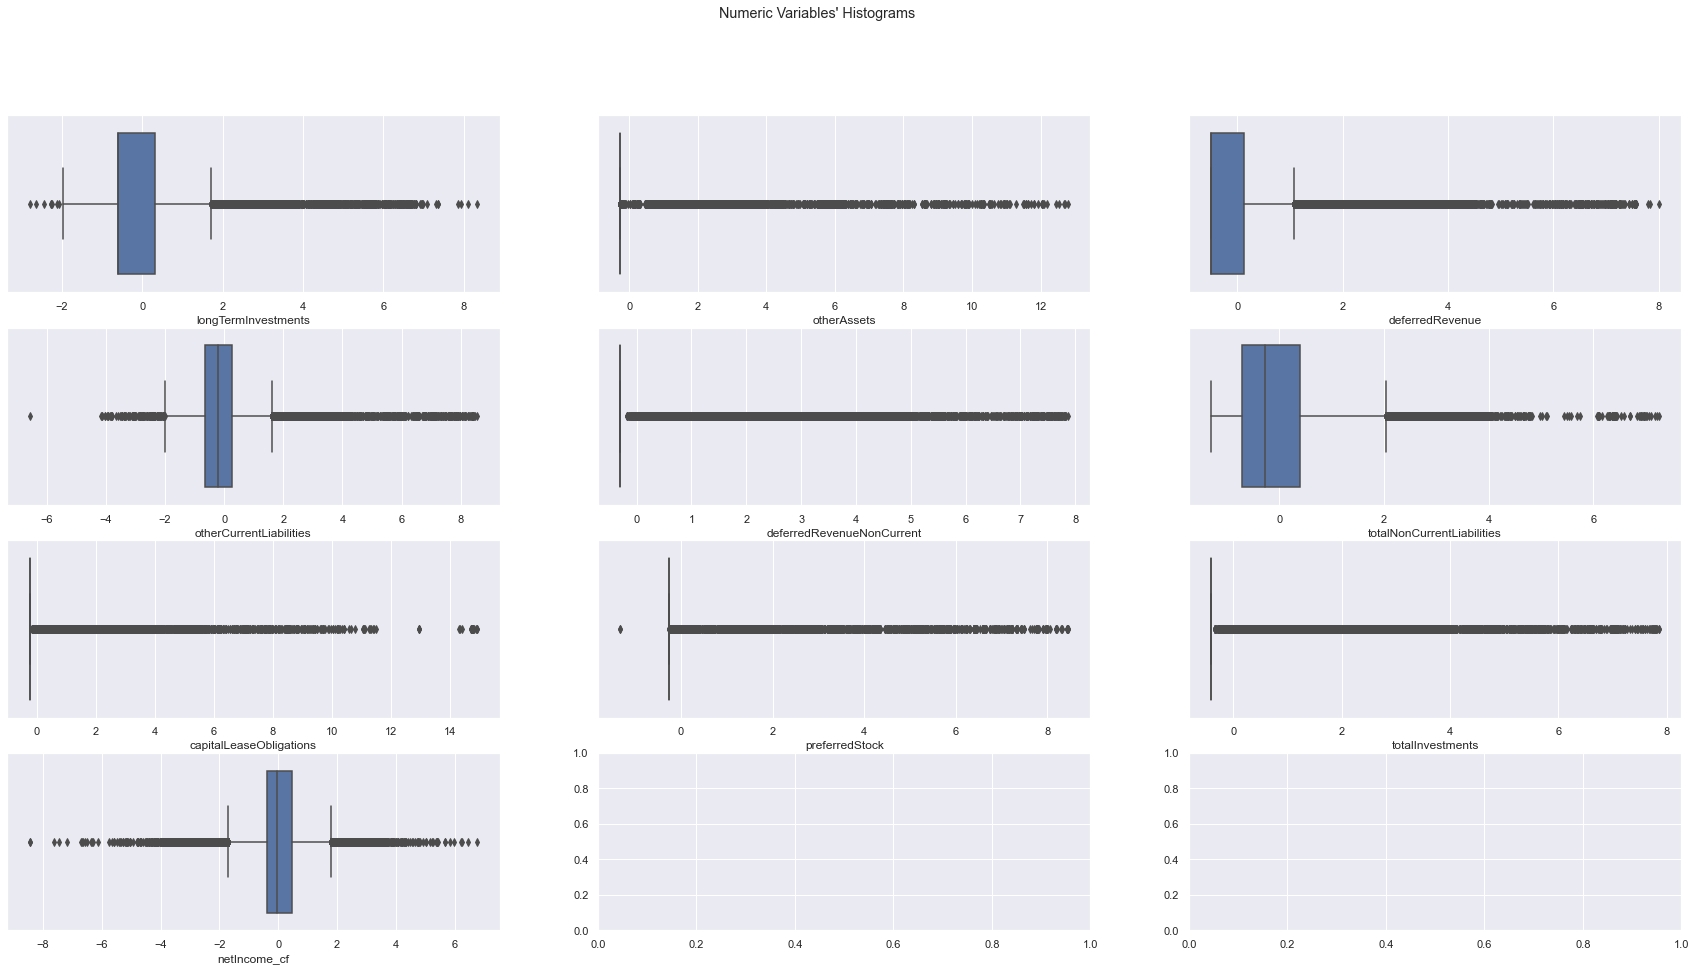

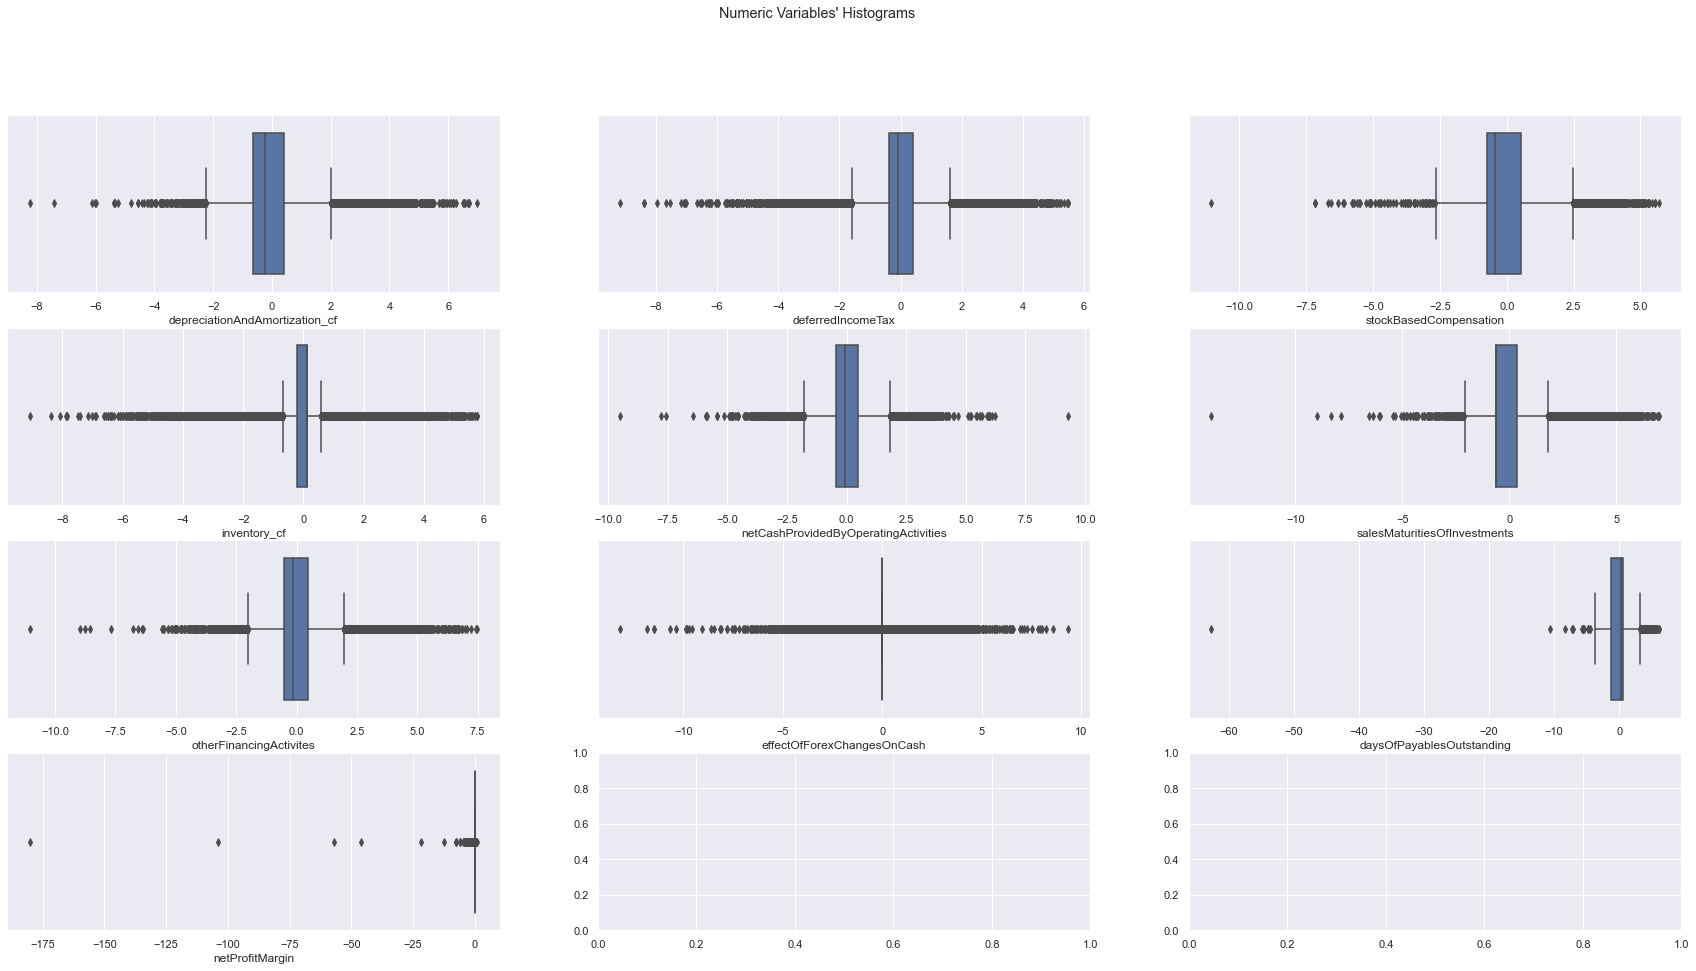

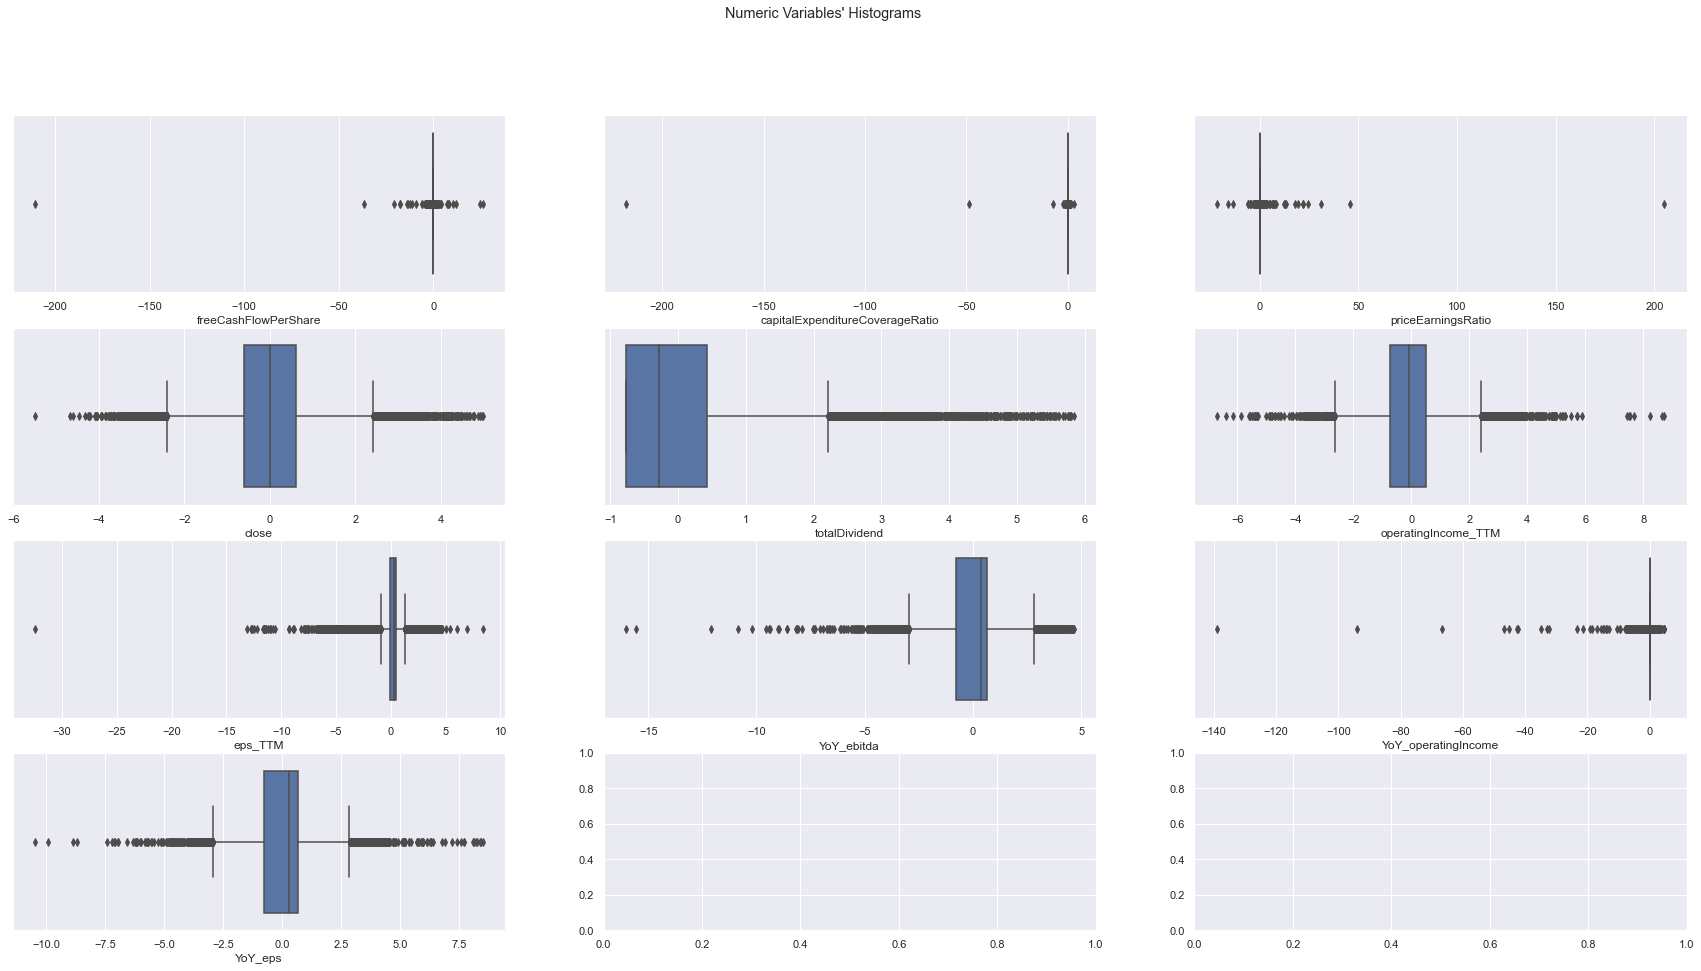

In [57]:
viz.Boxplot(x_train_skew_stand_out)

#### Feature Distribution Againts Target

Number of metric features : 40
Plotting Multiple Figures


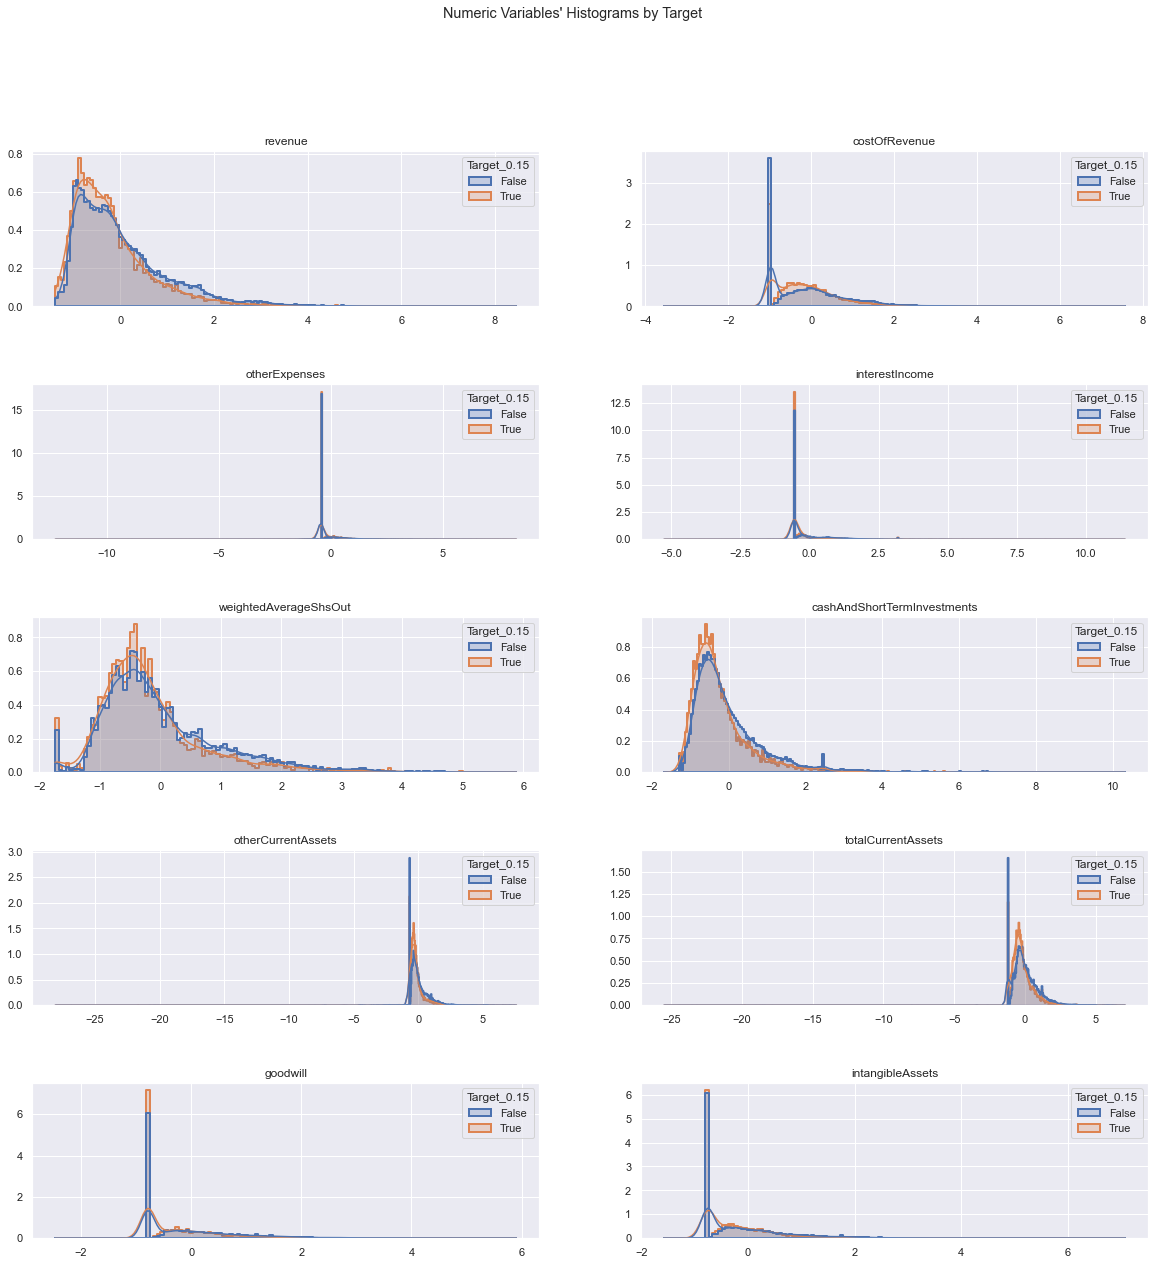

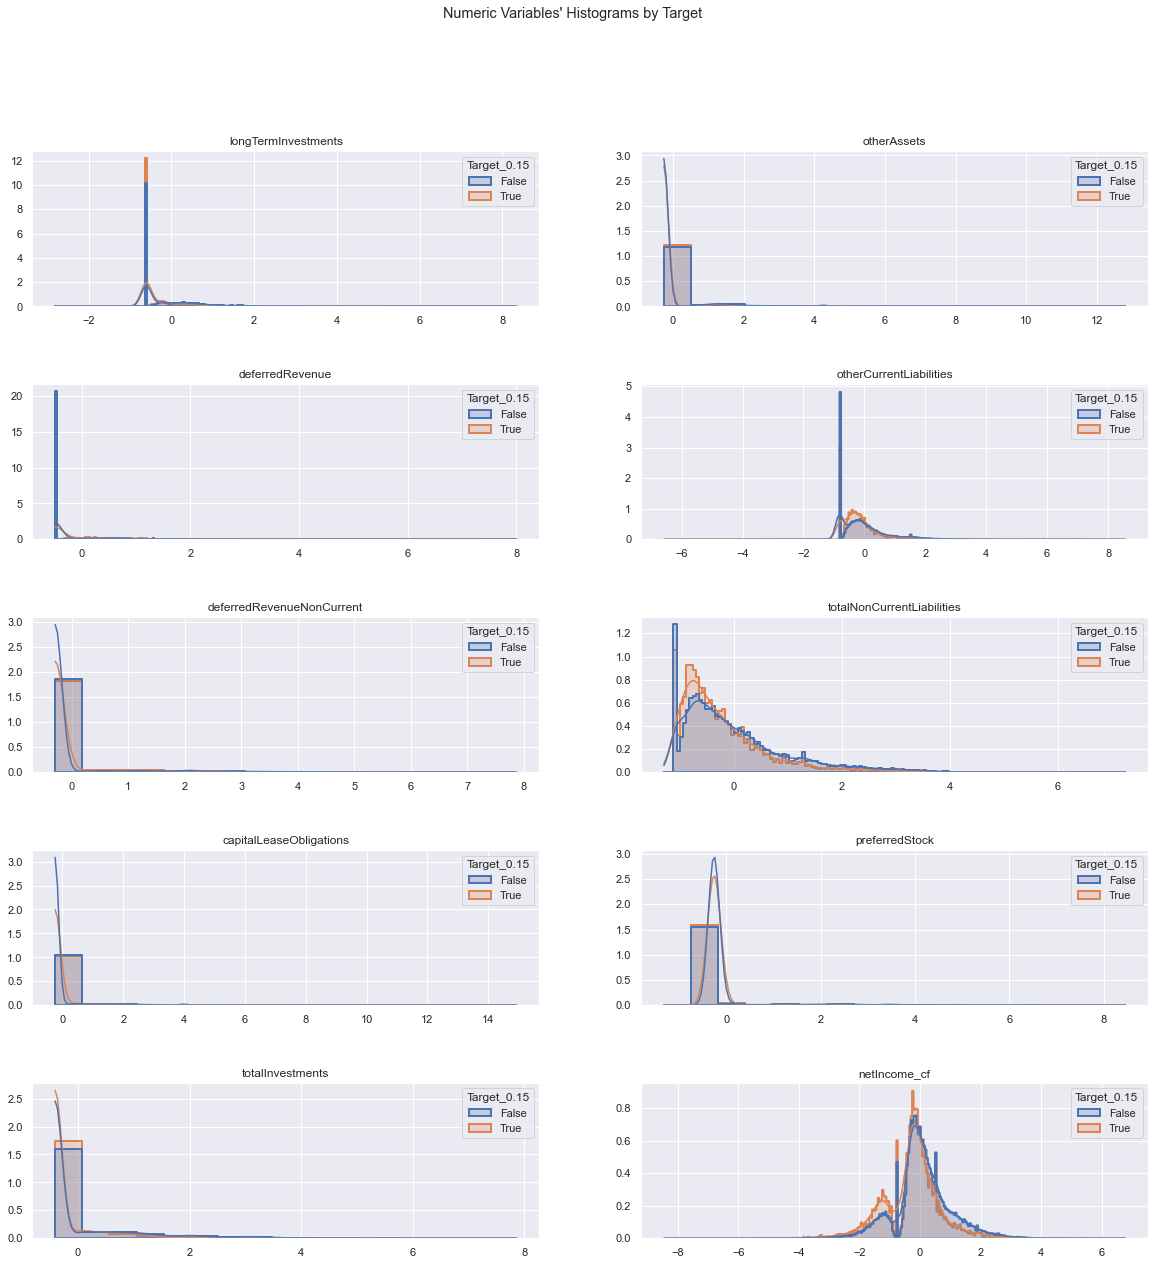

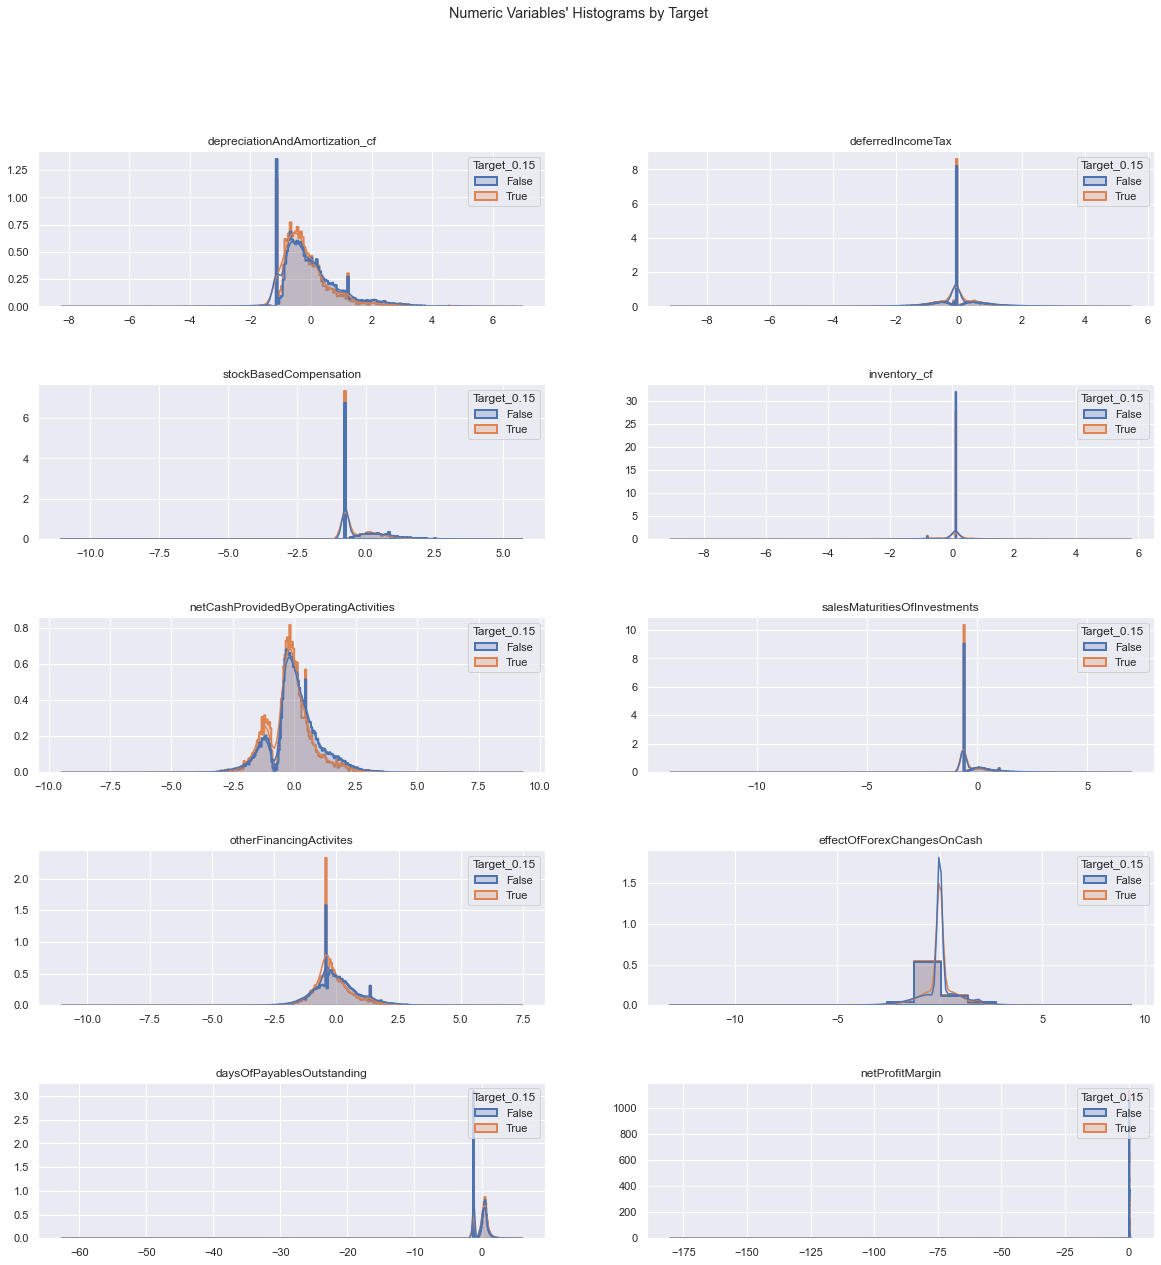

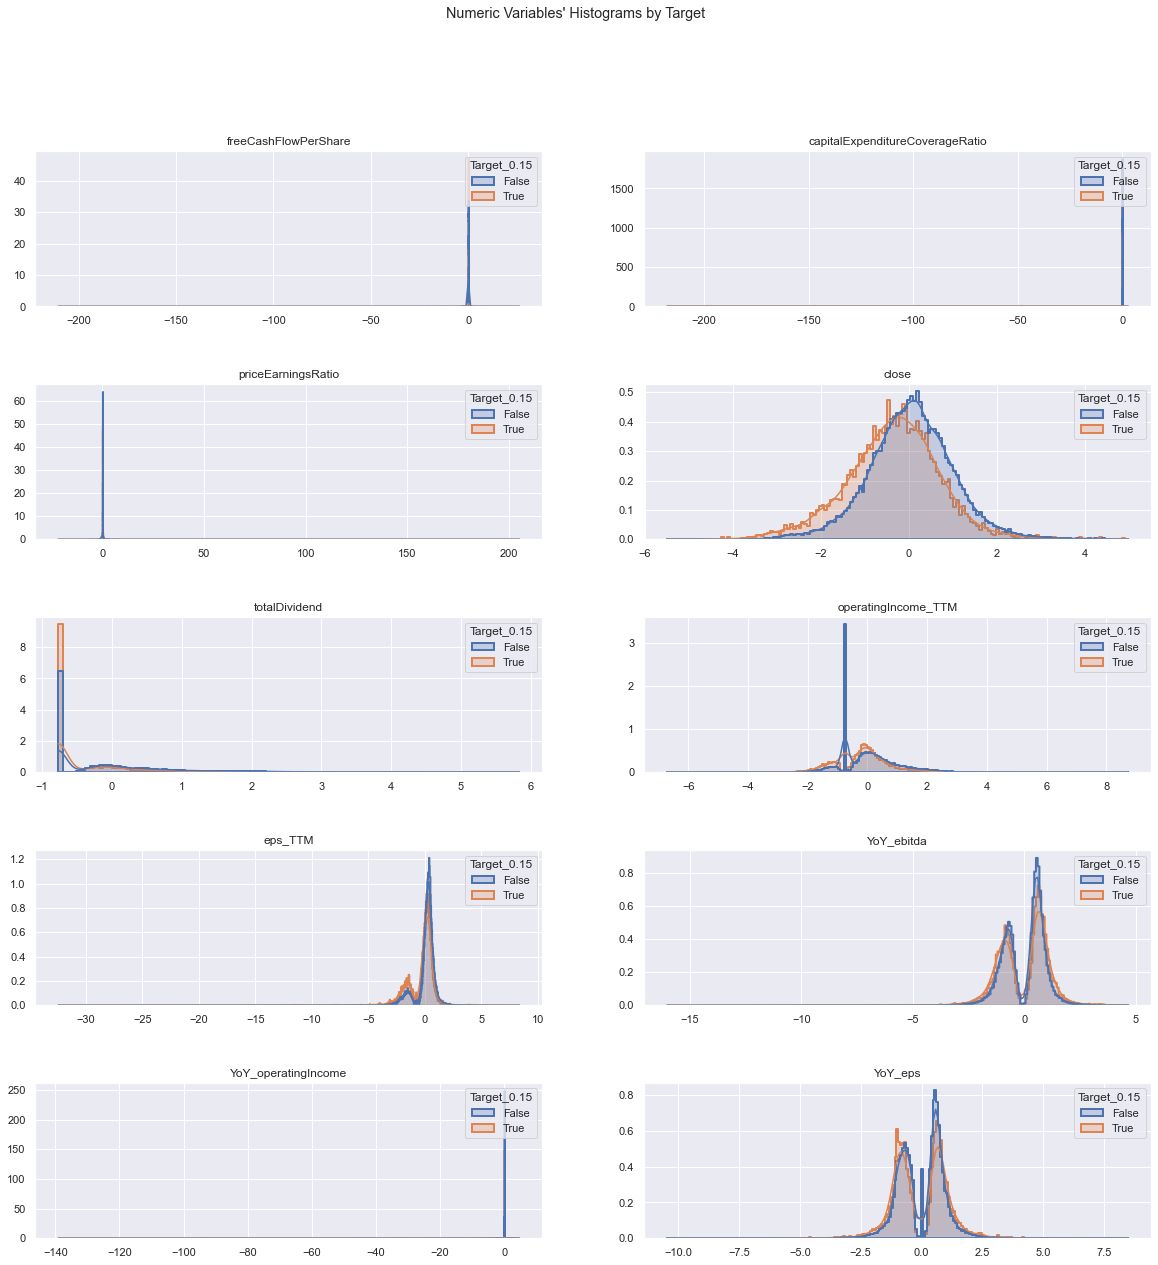

In [58]:
df_explor = pd.concat([x_train_skew_stand_out, y_train_dict['Target_0.15']],axis=1)
viz.Target_Histogram(df_explor,'Target_0.15')

#### Assess Peromance 

#### Z-Score

In [64]:
model = DecisionTreeClassifier(class_weight='balanced',
                          random_state=0,max_depth=4)

z_score = class_cv.validateModel(x_train_skew_stand_out,
                                  Y_train,
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

z_score = z_score['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.544597
f1_train           0.557320
recall_train       0.559489
precision_train    0.561097
auc_train          0.544049
accuracy_test      0.525126
f1_test            0.532891
recall_test        0.533849
precision_test     0.543535
auc_test           0.524811
dtype: float64


#### Winsorizing

In [67]:
model = DecisionTreeClassifier(class_weight='balanced',
                          random_state=0,max_depth=4)

winsorizing = class_cv.validateModel(x_train_out_skew[lasso_subset_0],
                                  y_train_dict['Target_0'],
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

winsorizing = winsorizing['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.543386
f1_train           0.547814
recall_train       0.543754
precision_train    0.562936
auc_train          0.543373
accuracy_test      0.524196
f1_test            0.533932
recall_test        0.534569
precision_test     0.541094
auc_test           0.523806
dtype: float64


### Target 0 - MI

In [73]:
x_train_mi = x_train_skew_stand[mi_subset_0]
outliers_mi = x_train_mi.loc[abs(x_train_mi.values>4.5) ].reset_index().drop_duplicates(['symbol','date']).set_index(['symbol', 'date', 'fillingDate', 'year', 'quarter']).index
x_train_out_mi = x_train_skew.loc[x_train_skew.index.isin(outliers_mi)==False,mi_subset_0]

x_train_skew_stand_out = (x_train_out_mi - x_train_out_mi.mean()) / x_train_out_mi.std() 

Y_train = y_train_dict['Target_0'].loc[y_train_dict['Target_0'].index.isin(x_train_skew_stand_out.index)]

init_len = len(x_train_mi)
fin_len = len(x_train_skew_stand_out)

pct_removed =1-( fin_len/init_len)

print(f'{pct_removed}% of the data was removed')

0.03176716758607567% of the data was removed


#### Feature Distribution

Number of metric features : 24


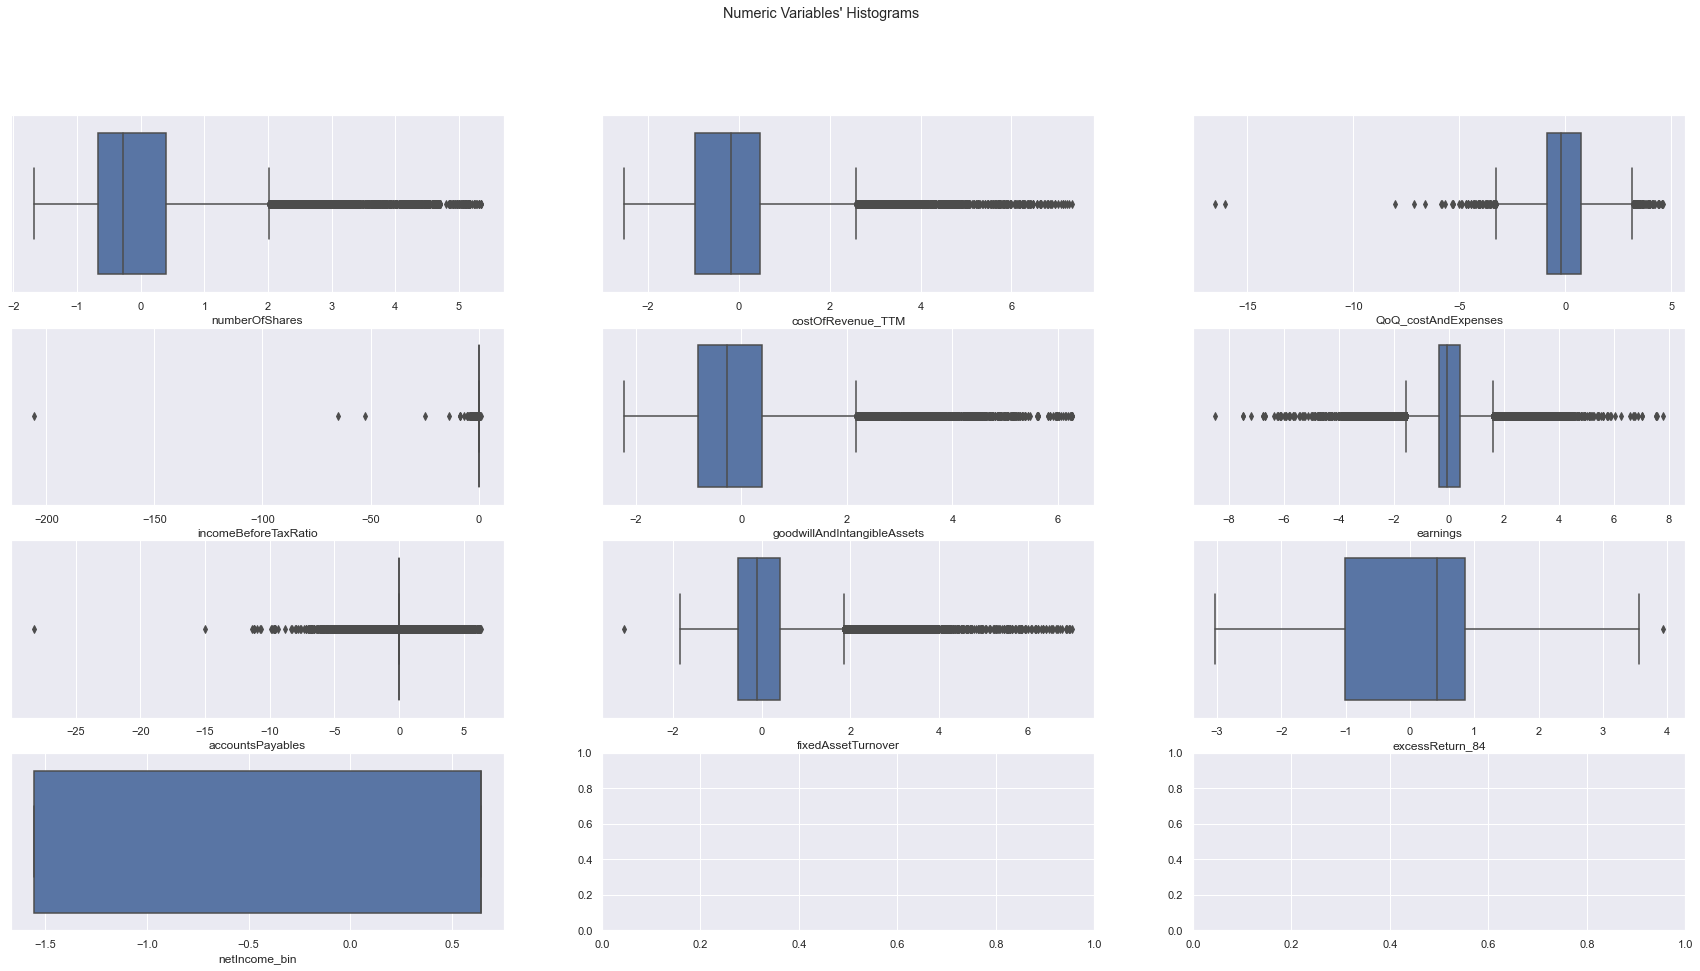

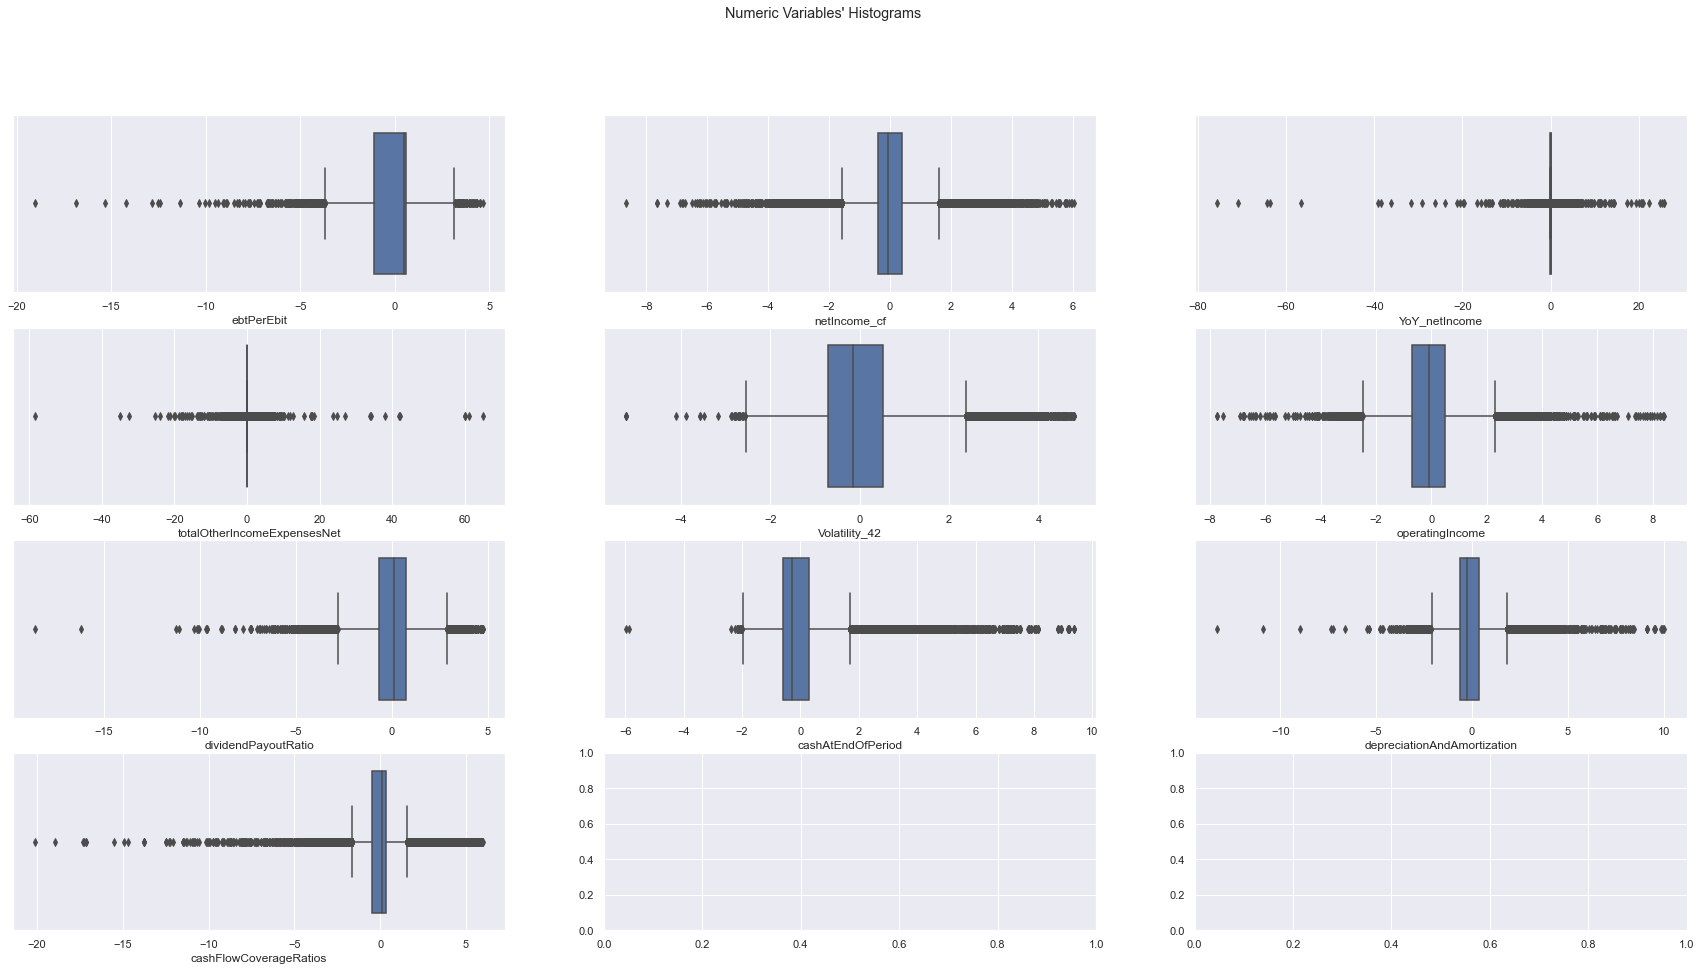

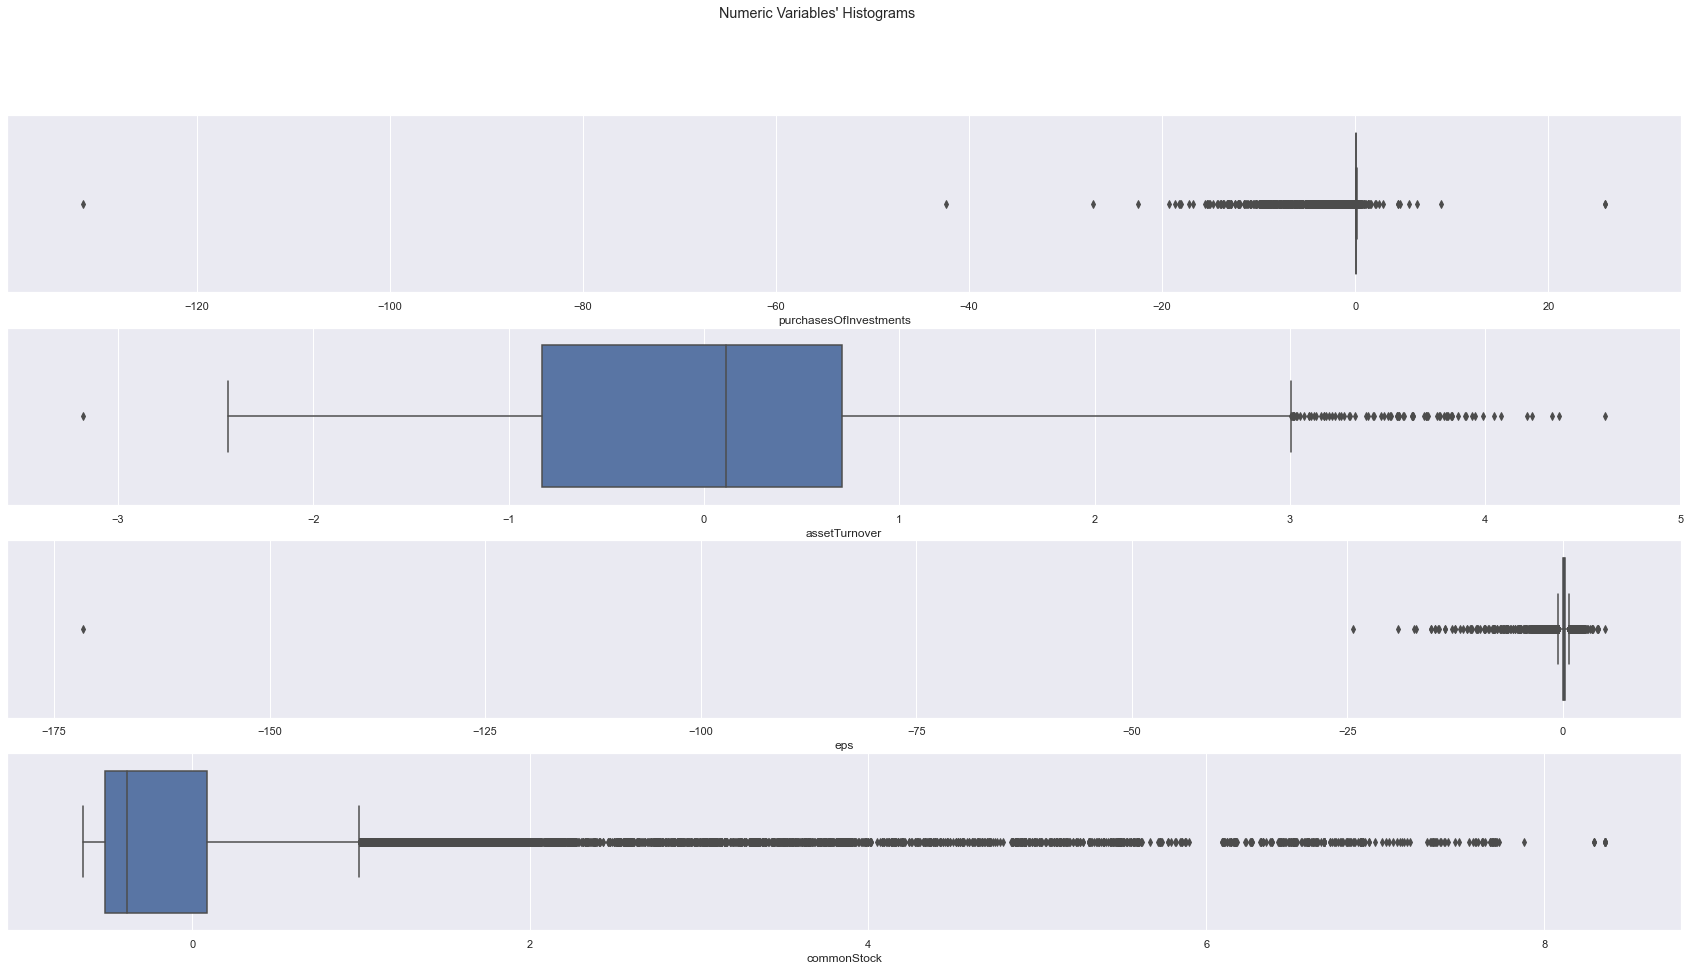

In [75]:
viz.Boxplot(x_train_skew_stand_out)

Number of metric features : 24
Plotting Multiple Figures


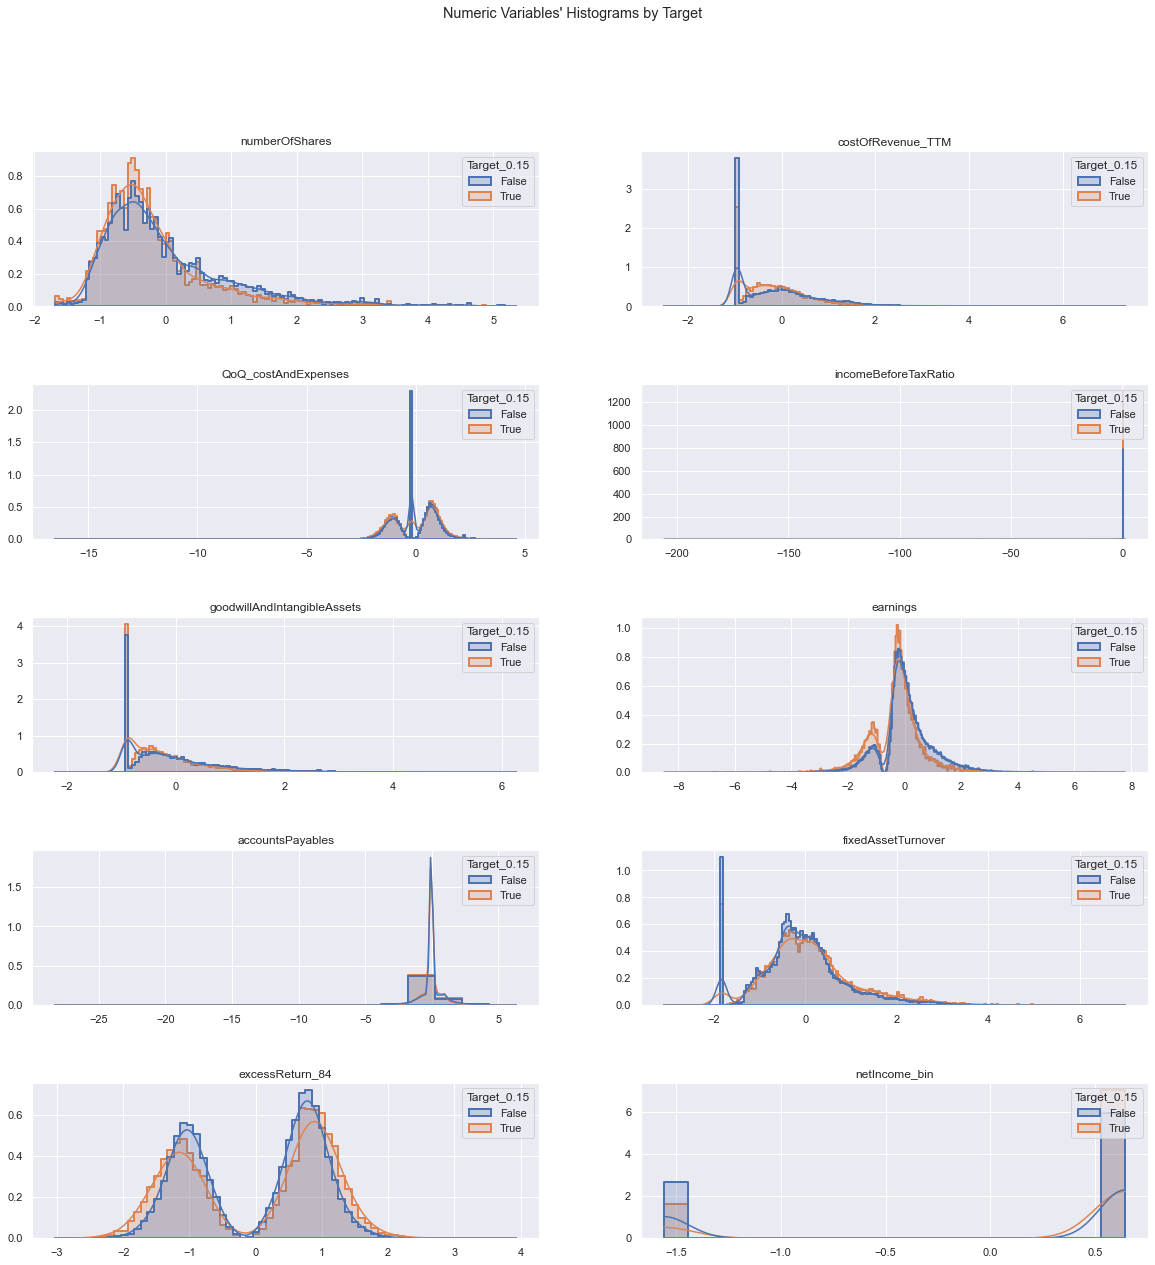

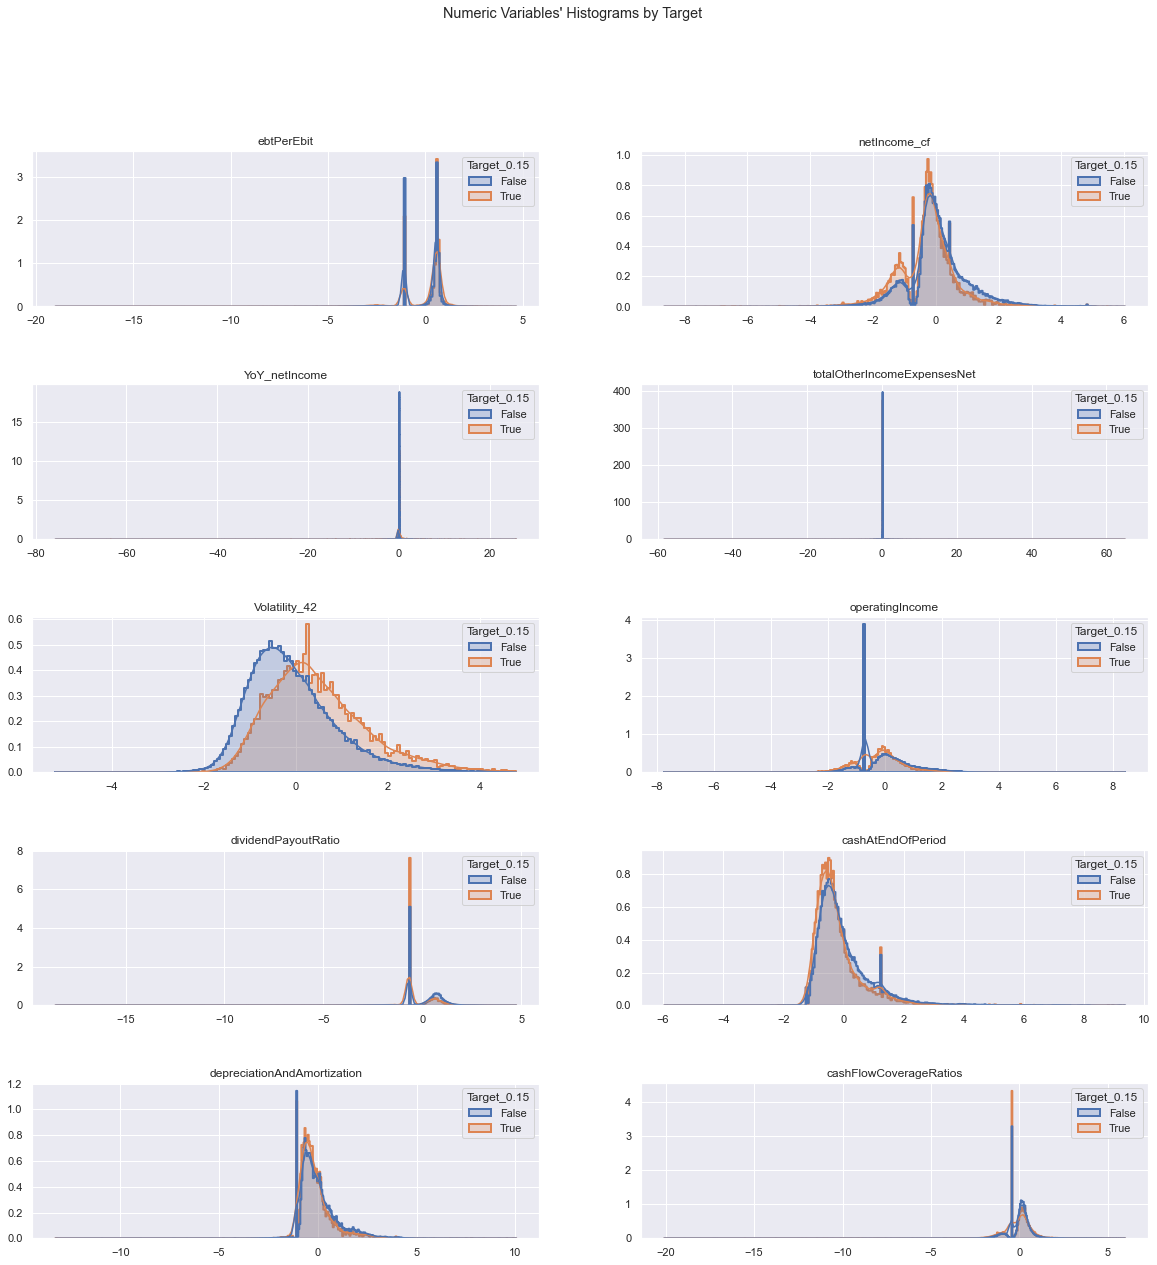

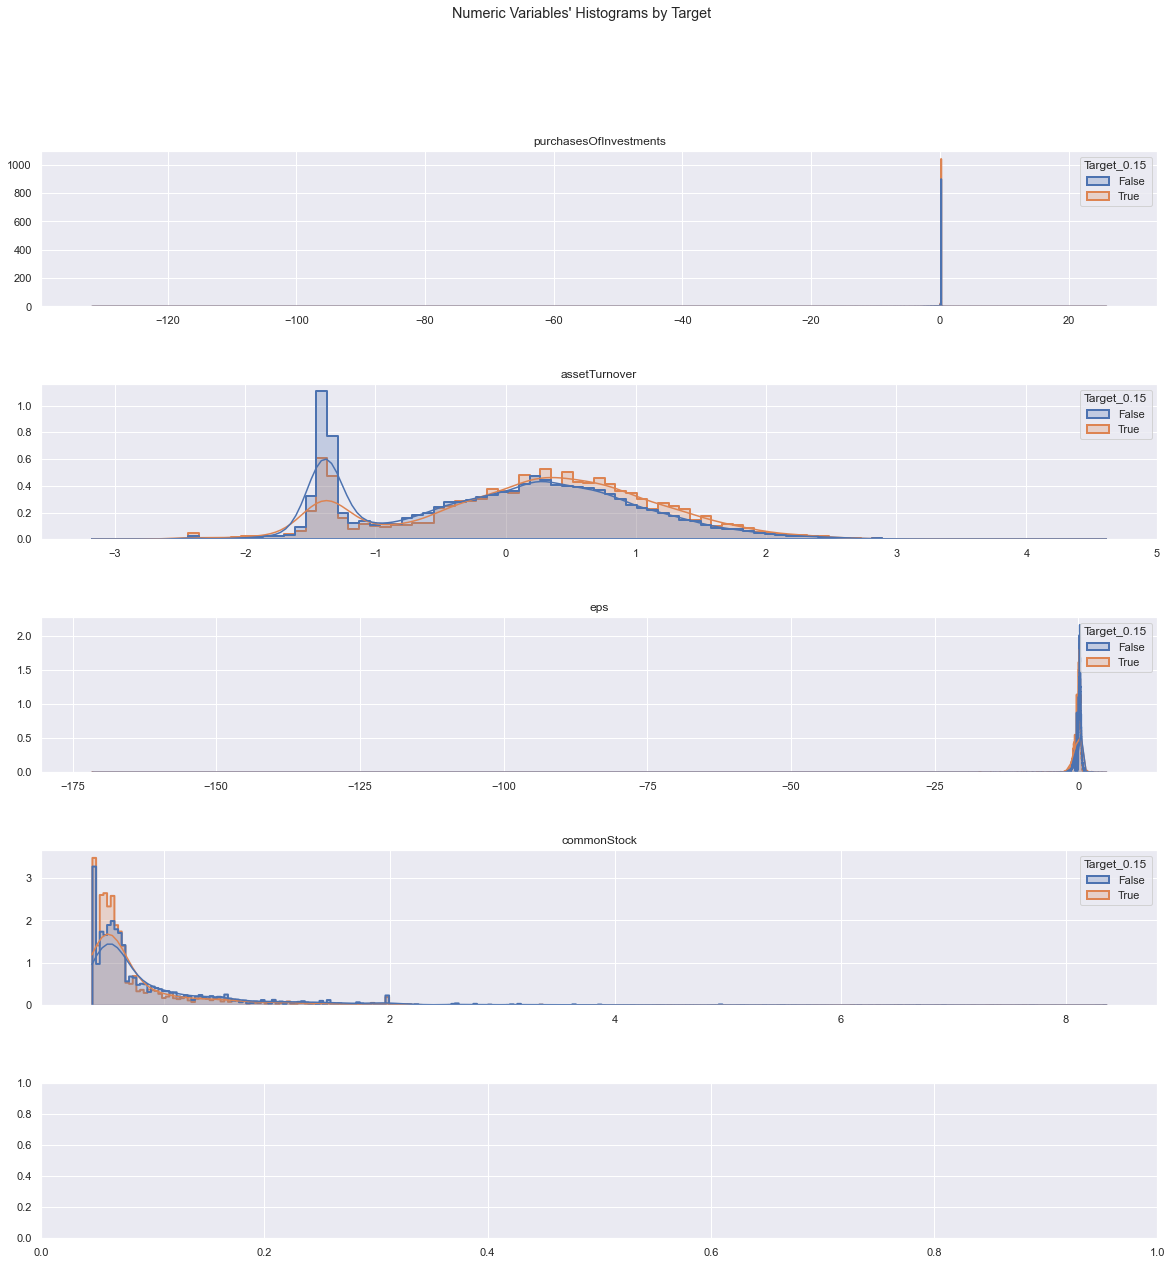

In [76]:
df_explor = pd.concat([x_train_skew_stand_out, y_train_dict['Target_0.15']],axis=1)
viz.Target_Histogram(df_explor,'Target_0.15')

#### Assess Peromance 

#### Z-Score

In [77]:
model = DecisionTreeClassifier(class_weight='balanced',
                          random_state=0,max_depth=4)

z_score = class_cv.validateModel(x_train_skew_stand_out,
                                  Y_train,
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

z_score = z_score['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.535527
f1_train           0.534241
recall_train       0.522498
precision_train    0.555788
auc_train          0.536005
accuracy_test      0.516248
f1_test            0.496775
recall_test        0.493298
precision_test     0.536763
auc_test           0.517085
dtype: float64


#### Winsorizing

In [80]:
model = DecisionTreeClassifier(class_weight='balanced',
                          random_state=0,max_depth=4)

winsorizing = class_cv.validateModel(x_train_out_skew[mi_subset_0],
                                  y_train_dict['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

winsorizing = winsorizing['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.536931
f1_train           0.553639
recall_train       0.563267
precision_train    0.552978
auc_train          0.535944
accuracy_test      0.518433
f1_test            0.514439
recall_test        0.525007
precision_test     0.536767
auc_test           0.518169
dtype: float64


### Target 0 - All Features

In [83]:
x_train_mi = x_train_skew_stand[:]
outliers_mi = x_train_mi.loc[abs(x_train_mi.values>10) ].reset_index().drop_duplicates(['symbol','date']).set_index(['symbol', 'date', 'fillingDate', 'year', 'quarter']).index
x_train_out_mi = x_train_skew.loc[x_train_skew.index.isin(outliers_mi)==False,:]

x_train_skew_stand_out = (x_train_out_mi - x_train_out_mi.mean()) / x_train_out_mi.std() 

Y_train = y_train_dict['Target_0'].loc[y_train_dict['Target_0'].index.isin(x_train_skew_stand_out.index)]

init_len = len(x_train_mi)
fin_len = len(x_train_skew_stand_out)

pct_removed =1-( fin_len/init_len)

print(f'{pct_removed}% of the data was removed')

0.45862659311394327% of the data was removed


Number of metric features : 24
Plotting Multiple Figures


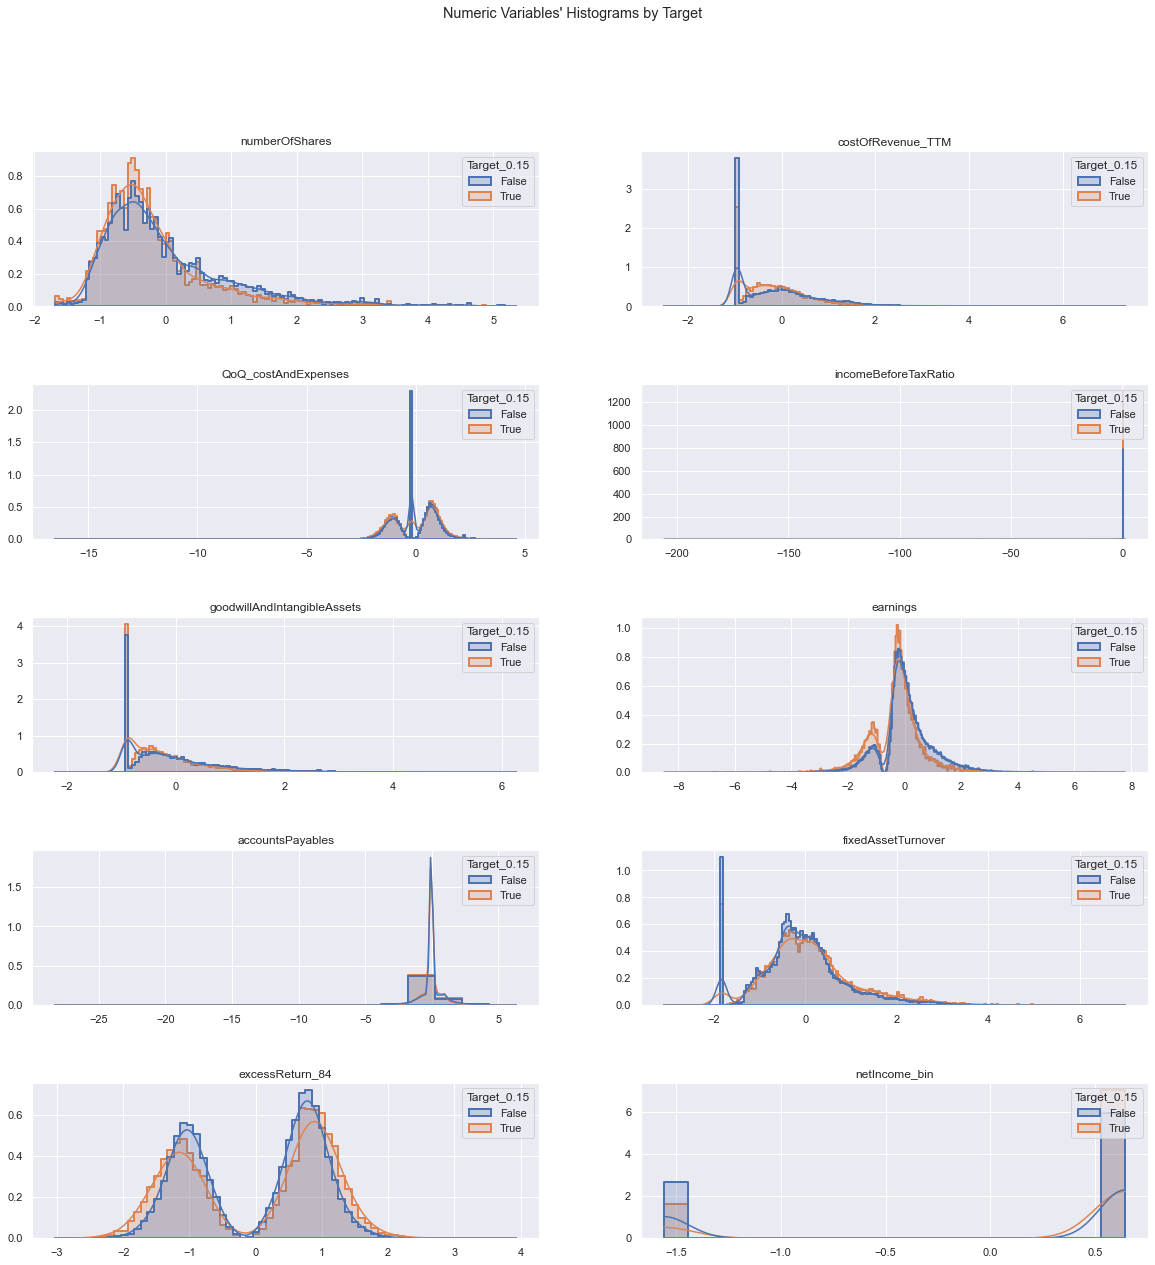

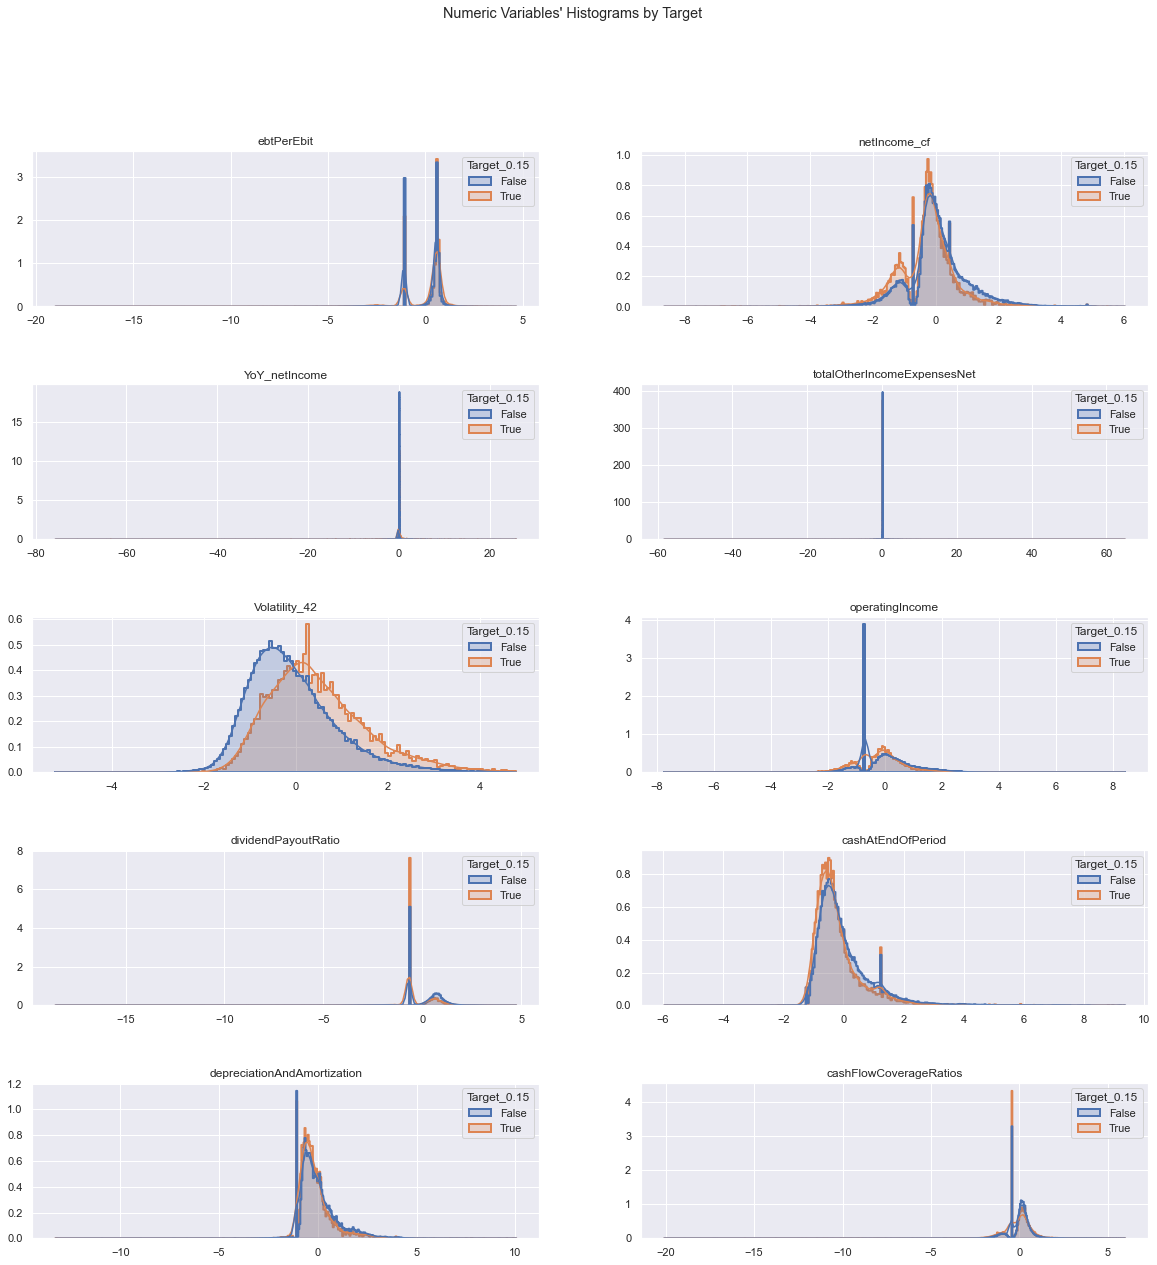

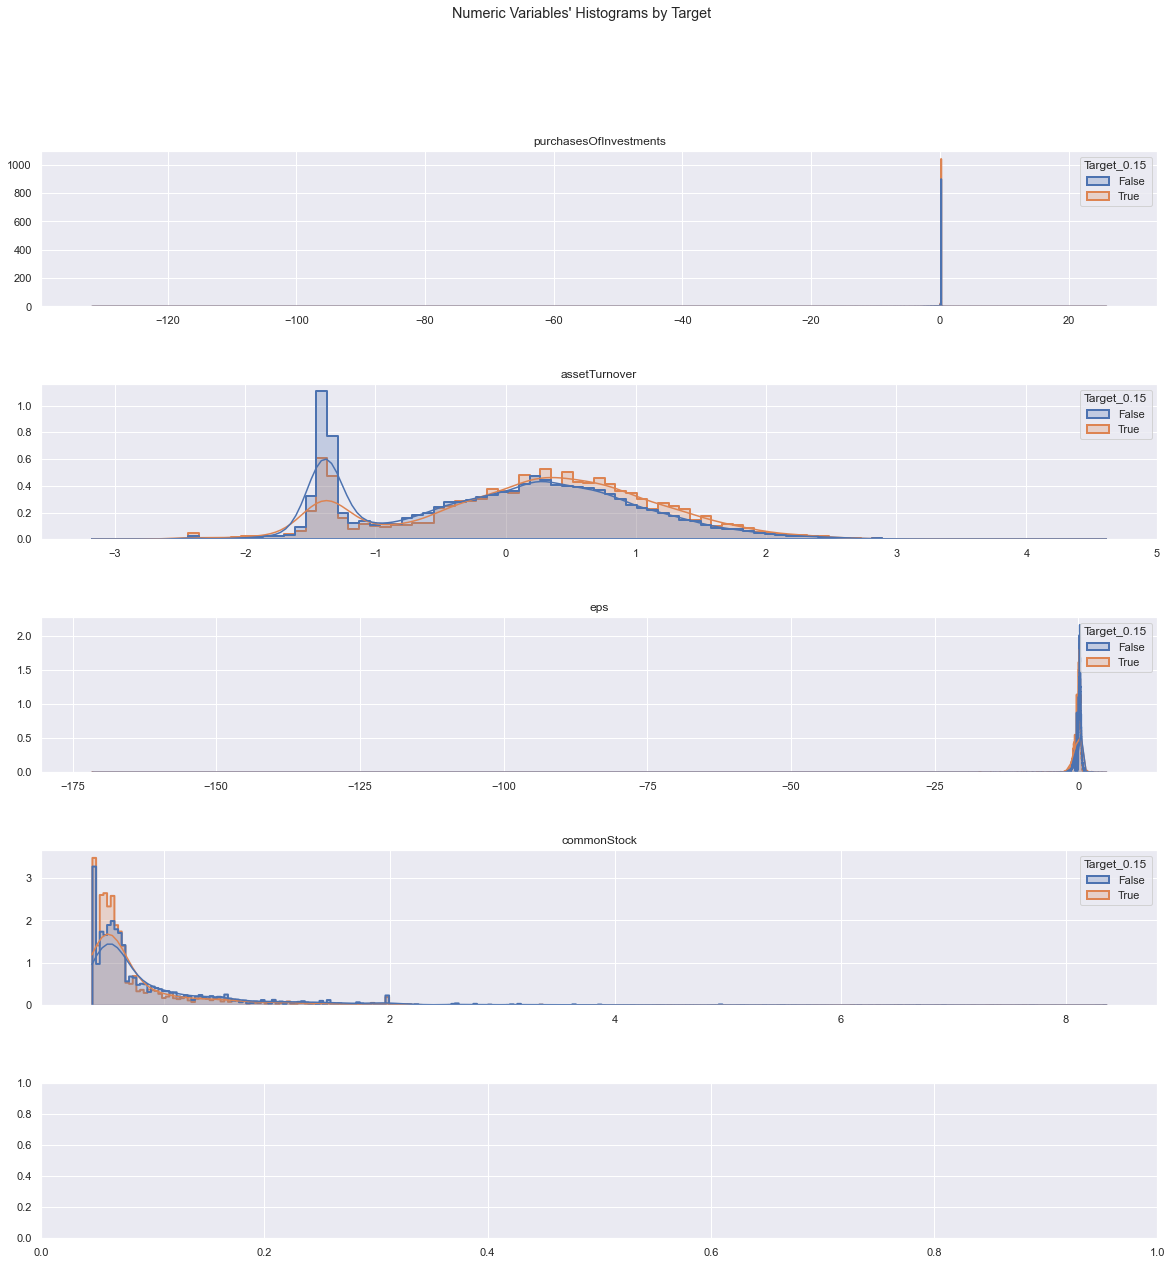

In [ ]:
df_explor = pd.concat([x_train_skew_stand_out, y_train_dict['Target_0.15']],axis=1)
viz.Target_Histogram(df_explor,'Target_0.15')

#### Assess Peromance 

#### Z-Score

In [ ]:
model = DecisionTreeClassifier(class_weight='balanced',
                          random_state=0,max_depth=4)

z_score = class_cv.validateModel(x_train_skew_stand_out,
                                  Y_train,
                                  model=model ,
                                  scaler=False,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

z_score = z_score['scores']

stratKfold
Nr of splits: 10
accuracy_train     0.535527
f1_train           0.534241
recall_train       0.522498
precision_train    0.555788
auc_train          0.536005
accuracy_test      0.516248
f1_test            0.496775
recall_test        0.493298
precision_test     0.536763
auc_test           0.517085
dtype: float64


#### Winsorizing

In [ ]:
model = DecisionTreeClassifier(class_weight='balanced',
                          random_state=0,max_depth=4)

winsorizing = class_cv.validateModel(x_train_out_skew[mi_subset_0],
                                  y_train_dict['Target_0'],
                                  model=model ,
                                  scaler=True,
                                    over_sampling=False,
                                    predictions=False,
                                    cv_type='stratKfold',
                                    scaler_type='stand',
                                    train_size=10,
                                    test_size=1,
                                    gap=0)

winsorizing = winsorizing['scores']

stratKfold
Nr of splits: 10
Scalling will be performed at each iteration
Scaler type: stand
accuracy_train     0.536931
f1_train           0.553639
recall_train       0.563267
precision_train    0.552978
auc_train          0.535944
accuracy_test      0.518433
f1_test            0.514439
recall_test        0.525007
precision_test     0.536767
auc_test           0.518169
dtype: float64
